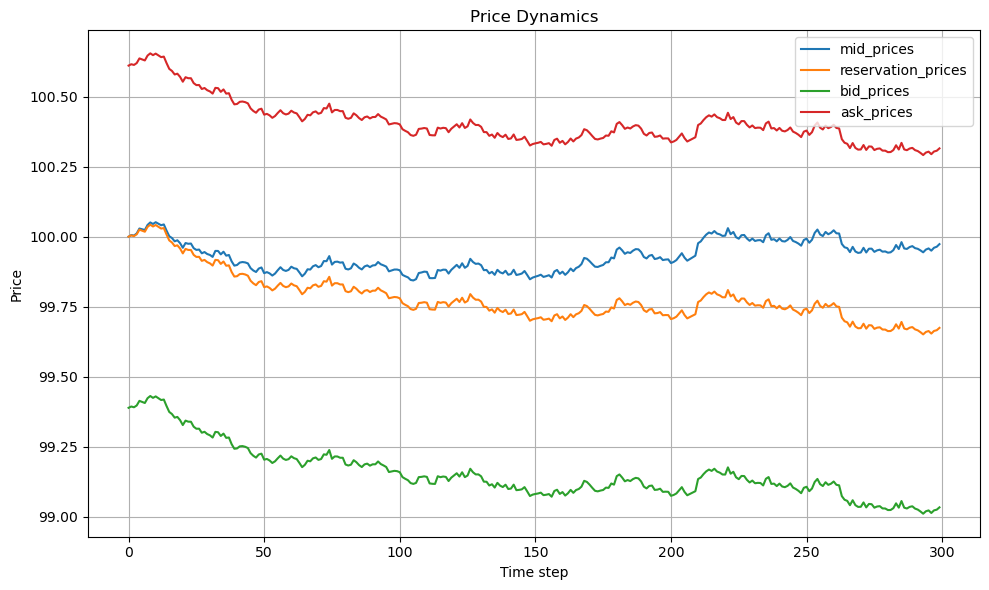

In [3]:
# main.py
from src.simulations.arithmetic_brownian import ArithmeticBrownianMotion
from src.strategies.avellaneda_stoikov_for_abm import AvellanedaStoikovStrategyAbm
from src.executions.poisson_execution_for_abm import PoissonExecutionForAbm
from src.executions.Assym_Poisson_Execution import AsymPoissonOrderExecution
from src.core.inventory_manager import InventoryManager
from src.core.data_logger import DataLogger
from src.core.simulation_runner import SimulationRunner
import pandas as pd

import matplotlib.pyplot as plt

def main():
    # Initialize components
    market = ArithmeticBrownianMotion(300,100,0.2,42)
    strategy = AvellanedaStoikovStrategyAbm(gamma=1.5, k=1, inventory=5,abm=market)
    execution = PoissonExecutionForAbm(A=100,cash=0,strategy=strategy)
    #execution = AsymPoissonOrderExecution(A_bid = 160.0, A_ask = 120.0, k_bid = 1.2, k_ask = 1.8, cash = 0.0, strategy=strategy)
    inventory = InventoryManager(initial_cash=5, initial_inventory=5)
    logger = DataLogger()

    # Configure simulation
    runner = SimulationRunner(
        market=market,
        pricing_strategy=strategy,
        order_execution=execution,
        inventory=inventory,
        logger=logger,
        dt=1/300,
        T=1.0
    )

    # Run and analyze
    runner.run()
    df = logger.get_dataframe()
    df.to_csv('simulation_results.csv', index=False)

 
    first = df.iloc[0]
    n = len(df)   # e.g. 300

    mid_list        = df['mid_prices'].values           
    reserve_list    = first['reservation_prices'][:n]    
    bid_list        = first['bid_prices'][:n]
    ask_list        = first['ask_prices'][:n]

    df2 = pd.DataFrame({
        'mid_prices':         mid_list,
        'reservation_prices': reserve_list,
        'bid_prices':         bid_list,
        'ask_prices':         ask_list,
    })


    ax = df2.plot(
        y=['mid_prices','reservation_prices','bid_prices','ask_prices'],
        figsize=(10,6),
        grid=True,
        title='Price Dynamics'
    )
    ax.set_xlabel('Time step')
    ax.set_ylabel('Price')
    plt.tight_layout()
    plt.show()

    


if __name__ == "__main__":
    main()
